___
# Lecture 1 - Noise processes
___

To start off, an example. Let's say we want to predict the daily average temperature in a town. We can try that in multiple ways: 

1. **Linear regression** - we might pick some predictors (independent variables such as the city elevation, latitude, longitude, time of the year etc.) We could plug all of these into the model to predict what the temperature would be in our city. 
2. **Time series** - in this context, perhaps the best information that we have available is the average temperature today, yesterday and the day before yesterday and on and on. We would use previous temperature measurements to predict future measurements. 
    - But the problem gets harder here. In Linear Regression we assume independence between observations (strong but often valid, but that depends on the data). In the time series context we no longer have that, we are doing statistics with **temporal** dependency. 
    - Also, there's **causality**, i.e., the past predicts/dictates the future. Maybe it does, maybe not, we don't actually know. We'd actually have to analyze the data before reaching any conclusion here. In the example of temperature prediction, we know that it probably is the case as the temperatures change day-to-day rather slowly. 

We are watching measurements over time (like stocks, disease cases etc.).

Before looking at real data, we're going to look at some mathematical models

___

## Types of noise

### "Weak" White Noise

The groundwork, in some sense, for all time series models.

Let $w_t$ be a random variable (or stochastic process) indexed by time $t \in [0, T]$, with the following assumptions:

- $\mathbb{E}[w_t] = 0$, which means the expected value (mean) of the white noise process is zero;
- $\mathrm{Var}(w_t) = \sigma^2$, which means the variance is constant over time;
- $\mathrm{Cov}(w_t, w_s) = 0$ for all $t \ne s$, which means the covariance between values at different time points is zero. In other words, observations are uncorrelated (though not necessarily independent).

At any given time, we just observe a random value. It has mean zero and constant variance, and values at different times are **uncorrelated** (i.e., **no linear relationship**).


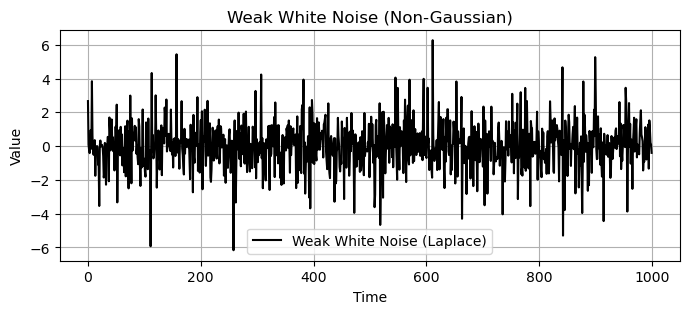

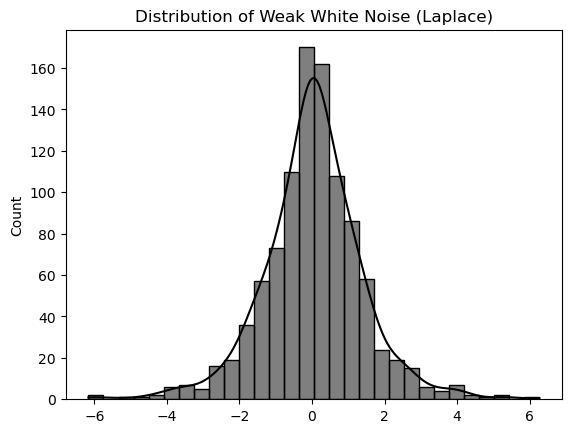

Mean: 0.03394566779762674
Deviation: 1.8852571189929603


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for the weak white noise we can't really use normal distribution
num_samples = 1000
mean = 0
scale = 1.0  # to control the variance

# generate WWN from Laplace distribution
w_weak = np.random.laplace(loc=mean, scale=scale, size=num_samples)

# Plot the time series
plt.figure(figsize=(8, 3))
plt.plot(w_weak, label="Weak White Noise (Laplace)", color="k")
plt.title("Weak White Noise (Non-Gaussian)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# plot the distribution
sns.histplot(w_weak, bins=30, kde=True, color="k")
plt.title("Distribution of Weak White Noise (Laplace)")
plt.show()


print(f"Mean: {w_weak.mean()}")
print(f"Deviation: {w_weak.var()}")

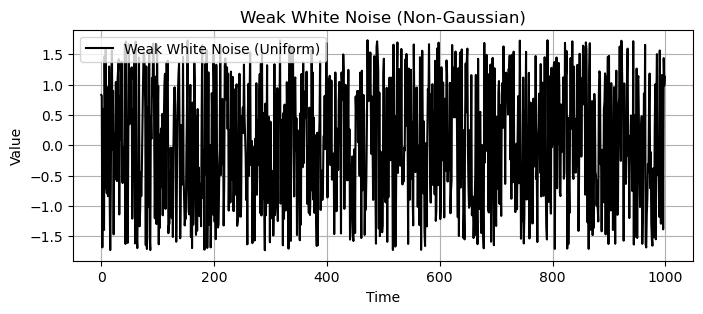

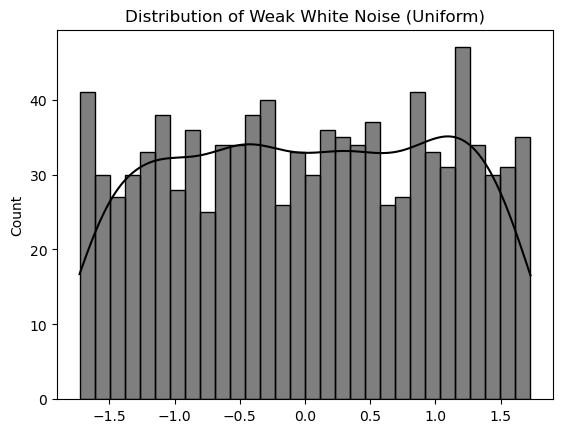

In [18]:
# uniform distribution example

# Uniform distribution between -a and a has:
# - mean = 0 (if the bounds are symmetric)
# - variance = (b-a)^2 / 12

a = np.sqrt(3)  # we do this so that variance is 1
w_uniform = np.random.uniform(low=-a, high=a, size=num_samples)

# Plot the time series
plt.figure(figsize=(8, 3))
plt.plot(w_uniform, label="Weak White Noise (Uniform)", color="k")
plt.title("Weak White Noise (Non-Gaussian)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# plot the distribution
sns.histplot(w_uniform, bins=30, kde=True, color="k")
plt.title("Distribution of Weak White Noise (Uniform)")
plt.show()

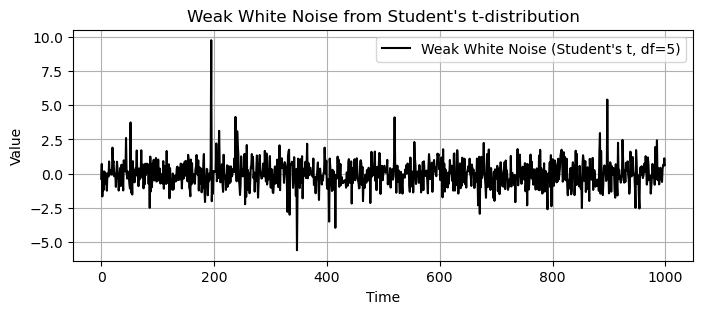

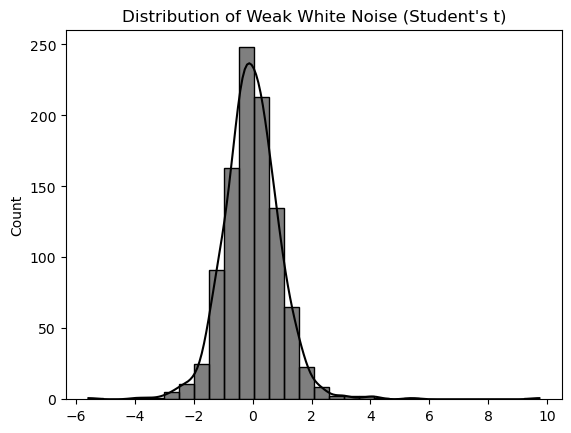

In [24]:
# Weak white noise from a Student's t-distribution
df = 5  # Degrees of freedom
w_t = np.random.standard_t(df, size=num_samples)

# Optionally standardize to have variance = 1
w_t_std = w_t / np.std(w_t)

# Plot
plt.figure(figsize=(8, 3))
plt.plot(w_t_std, label="Weak White Noise (Student's t, df=5)", color="k")
plt.title("Weak White Noise from Student's t-distribution")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Histogram
sns.histplot(w_t_std, bins=30, kde=True, color="k")
plt.title("Distribution of Weak White Noise (Student's t)")
plt.show()

### IID White Noise 

The same as above but replace "uncorrelated" with **"independent"**. This is a stronger White Noise setting. We assume that at any two distinct time points this process is completely independent of each other. That gives us a stronger groundwork to build from. All further models are going to build from White Noise. If we mess around with it a bit we'll get some different types of behaviour. 

### Gaussian White Noise

Same as above, with the additional assumption:

- $w_t \sim \mathcal{N}(0, \sigma^2)$ for all $t \in [0, T]$

This strenghted even more to get a nice normal distribution (strongest one out of all three). Normal distribution makes everything easier to handle. It is not unreasonable to assume normal distribution, typically it arises just about everywhere in data.

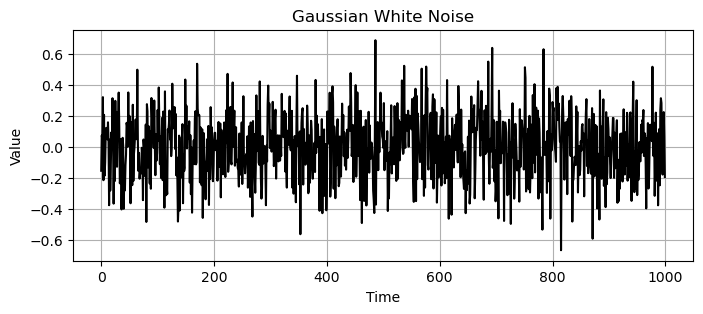

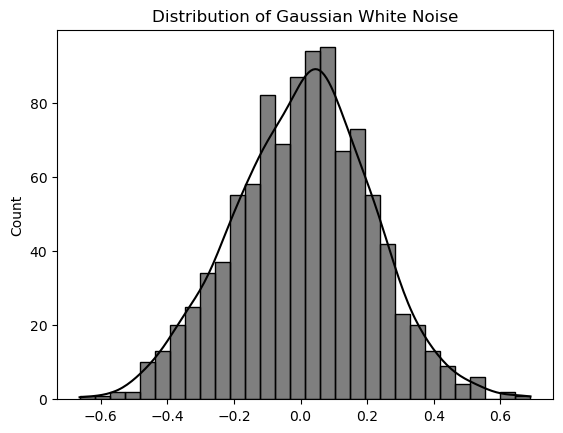

In [13]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0
std = 0.2
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.figure(figsize=(8, 3))
plt.plot(samples, color="k")
plt.title("Gaussian White Noise")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# plot the distribution
sns.histplot(samples, bins=30, kde=True, color="k")
plt.title("Distribution of Gaussian White Noise")
plt.show()

"White noise" term comes from signal processing setting, where it is a signal that contains every frequency. The example below is just for visualization, as it does not represent white noise.


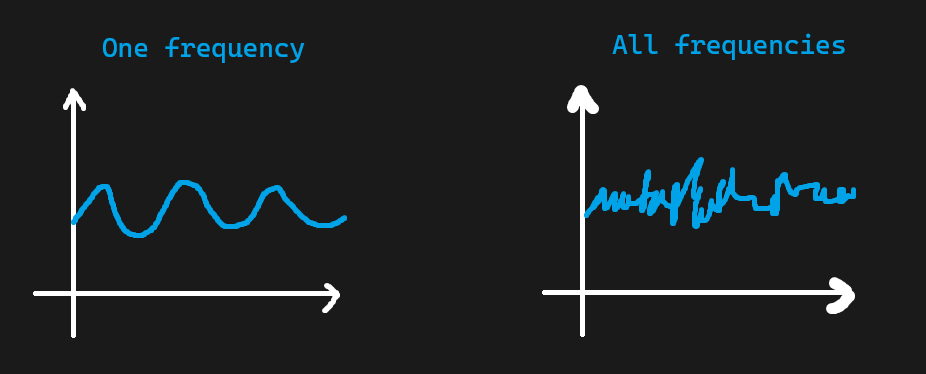

___

## Autoregressive process

### Autoregression Intuition

The word **"regressive"** stands out for a reason. In a regression setting, we use **independent variables** and form a **linear combination** of them to predict a **dependent variable**.

In time series, we apply a similar idea — but instead of using different variables, we use **past values of the same variable** to predict its future values.

The general form of an **autoregressive model of order $p$** (AR($p$)) is:

$$
X_t = \sum_{i=1}^{p} \theta_i X_{t - i} + w_t
$$

where:
- $\theta_i \in \mathbb{R}$ are the model coefficients (fixed real numbers),
- $w_t$ is a white noise term.


$X_t$ above is simply the **present value** (for example, the price of a stock at time $t$). 

The term under the summation is like a **weighted sum**, but it's more accurately called a **linear combination of the $p$ past values**.

The last term, $w_t$, is just **white noise at time $t$** — representing unpredictable random variation.


### Special case - random walk

X_t = X_(t-1) + w_t

WHat this says is that at time t I'm going to take the previous time step and add on some random noise. It's good to remember that w_t, even in the weakest sense, has mean 0 and a constant variance. What this means is we're gonna start at the previous time step and then we're either going to go up or down by some random amount. And that continues. 



### Special Case 1 – Random Walk

$$
X_t = X_{t-1} + w_t
$$

What this says is that at time $t$, we take the previous value $X_{t-1}$ and **add some random noise** $w_t$.

It's important to remember that $w_t$, even in the **weakest sense**, has **mean zero** and **constant variance**. 

This means that each new value is just the previous one **plus or minus some random fluctuation**. That process continues over time, causing the series to **wander without a fixed direction** — hence the name **random walk**.


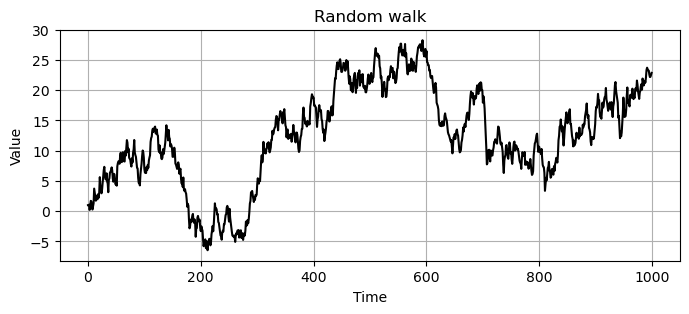

In [28]:
X_0 = 1
process = [X_0]
num_steps = 1000

for i in range(1, num_steps):
    X_t = process[-1] + np.random.normal()
    process.append(X_t)

process = np.array(process)

plt.figure(figsize=(8, 3))
plt.plot(process, color="k")
plt.title("Random walk")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

### Special Case 2 - Random Walk with Drift

$$
X_t = a + X_{t-1} + w_t
$$

The constant $a$ is some fixed real number $a \in \mathbb{R}$. If $a$ is some positive number this means that at every time point we're adding $a$, we're going up by $a$ units. This is in addition to the random noise. 

This is important because we might want to use a model like this to determine the trajectory of some random process, e.g., are the temperatures warming?

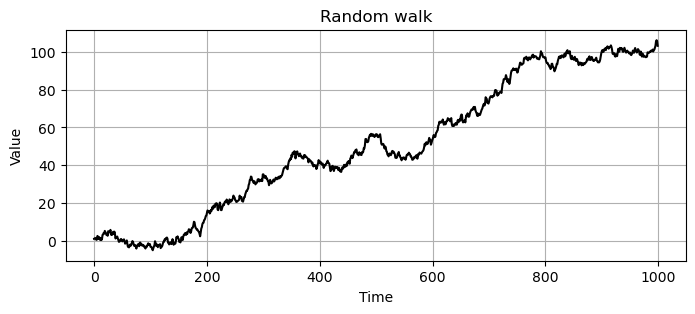

In [34]:
a = 0.1
X_0 = 1
process = [X_0]
num_steps = 1000

for i in range(1, num_steps):
    X_t = a + process[-1] + np.random.normal()
    process.append(X_t)

process = np.array(process)

plt.figure(figsize=(8, 3))
plt.plot(process, color="k")
plt.title("Random walk")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

### Some other examples - AR with already determined coefficients

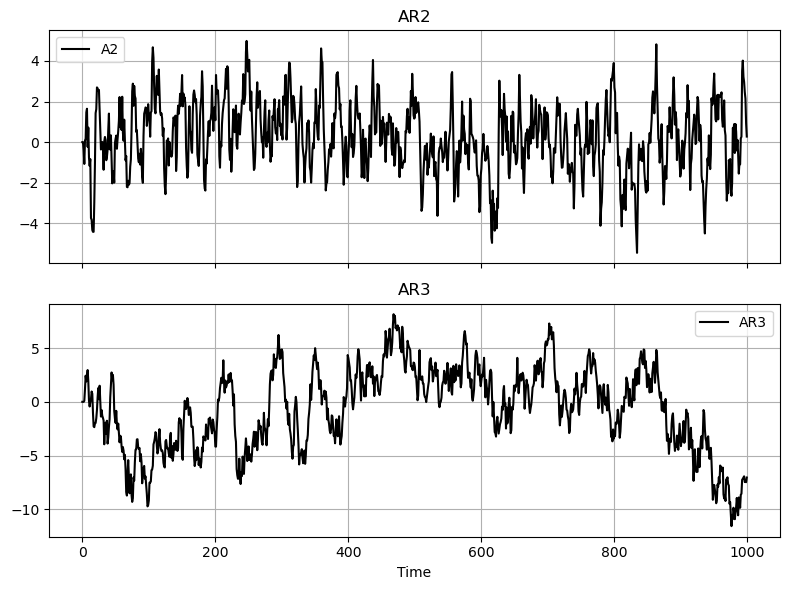

In [41]:
def ar2(x1, x2):
    theta1, theta2 = 1, -0.2
    return theta1 * x1 + theta2 * x2 + np.random.normal()


def ar3(x1, x2, x3):
    theta1, theta2 = 1, -0.2
    theta3 = 0.18
    return theta1 * x1 + theta2 * x2 + +theta3 * x3 + np.random.normal()


X_0 = 0
ar2_process = [X_0, X_0]
ar3_process = [X_0, X_0, X_0]

for i in range(2, num_steps):
    X_t = ar2(ar2_process[-1], ar2_process[-2])
    ar2_process.append(X_t)

for i in range(3, num_steps):
    X_t = ar3(ar3_process[-1], ar3_process[-2], ar3_process[-3])
    ar3_process.append(X_t)

# Create two vertically stacked subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)

# Plot first time series
axes[0].plot(range(num_steps), ar2_process, label="A2", color="k")
axes[0].set_title("AR2")
axes[0].grid(True)
axes[0].legend()

# Plot second time series
axes[1].plot(range(num_steps), ar3_process, label="AR3", color="k")
axes[1].set_title("AR3")
axes[1].grid(True)
axes[1].legend()

# Label the shared x-axis
plt.xlabel("Time")
plt.tight_layout()
plt.show()

Looking at the pictures above it is not obvious what type of AR / autoregressive process these are. We are going to be using statistical methods to take a good guess based on data what type of process we are looking at here. 

Both of them look stochastic in a way, but we can't be sure what the generating formula is.

___
## Moving average processes

A **Moving Average (MA)** process is a type of **smoothing** process. In a sense, it can be seen as a **smoothed version of white noise**.

The general formula for an MA($q$) process is:

$$
X_t = \sum_{j=1}^{q} \phi_j w_{t - j} + w_t
$$

where:
- $w_t$ is white noise,
- $\phi_j$ are the MA coefficients (real-valued weights applied to past white noise terms).

This means the value at time $t$ is constructed from a **linear combination of the past $q$ white noise terms**, plus the current noise. $X_t$ (the present value) is a weighted sum of past white noise values plus white noise at present. 

This is less intuitive in comparison to the AR models where we said that the current value is influenced by the past $p$ values. The easiest way to understand a Moving Average process is through an example — think of a **stock market scenario**.

Suppose $X_t$ represents the **price of a stock** at time $t$. If we model it as:

$$
X_t = \phi_1 w_{t-1} + w_t
$$

we're saying the following:

- $w_{t-1}$ is the **random shock (fluctuation)** that occurred at time $t-1$,
- $w_t$ is the **new random shock** occurring at time $t$.

In this view, the current price $X_t$ is influenced by **recent random movements** in the market, specifically the shocks from time $t$ and $t-1$.

In layman's temrs, one time unit (e.g. a day or a week) ago, if there's some random fluctuation that affects the price, this fluctuation will still be present in some sense at the next point. If the coefficient value $\phi$ is positive that means that a positive shock will still be present at the next time point. If it is negative on the other hand this means that the positive shock will come back as a negative shock at the next time point. 

MA is the second key thing, after AR to model time series data. 

Another form of the **Moving Average (MA)** definition is:

$$
X_t = \sum_{j = -q/2}^{q/2} \phi_j \, w_{t + j}
$$

In this case, we are averaging over a **symmetric window** centered around time $t$, that is:

- A window extending **before and after** time $t$,
- Specifically from $t - q/2$ to $t + q/2$.

This version is often used in **smoothing contexts** (e.g., signal processing), where the focus is on computing a **centered average** of nearby white noise terms. 

For this to happen we'd already have some sort of realization of a process. There could be cases where the coefficients would sum up to 1. 


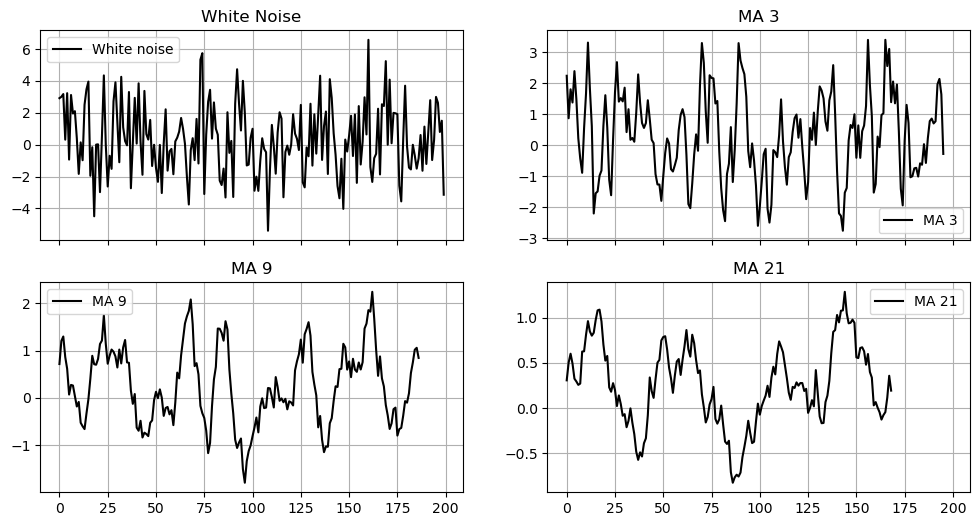

In [68]:
# first generate some white noise
mean = 0
std = 2
num_steps = 200
gaussian_wn = np.random.normal(mean, std, size=num_steps)


def ma(wn, q):
    # NOTE: q = 2 here, we're going from -1 to 0 to 1 so three elements, that's why MA(3)
    # phi_j = 1/3
    indices = np.arange(start=-q / 2, stop=q / 2 + 1, step=1).astype(int)
    phi_vec = np.ones_like(indices) / (q + 1)  # np.array([1/3, 1/3, 1/3])

    process = []
    for i in range(len(indices), len(wn) - (q // 2)):
        X_t = np.dot(wn[i + indices], phi_vec)
        process.append(X_t)

    return np.array(process)


ma_processes = []
q_vec = [2, 8, 20]
for q in q_vec:
    process = ma(gaussian_wn, q)
    ma_processes.append(process)

# Create two vertically stacked subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True)

# Plot first time series
axes[0, 0].plot(gaussian_wn, label="White noise", color="k")
axes[0, 0].set_title("White Noise")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot second time series
axes[0, 1].plot(ma_processes[0], label="MA 3", color="k")
axes[0, 1].set_title("MA 3")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot third time series
axes[1, 0].plot(ma_processes[1], label="MA 9", color="k")
axes[1, 0].set_title("MA 9")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot fourth time series
axes[1, 1].plot(ma_processes[2], label="MA 21", color="k")
axes[1, 1].set_title("MA 21")
axes[1, 1].grid(True)
axes[1, 1].legend()

## Something to *note* - discrete time
 We could consider time as continuous e.g. $X_t$ for $t \in [0, T]$. In these examples everything will be based on discrete time and uniform time steps, i.e., $t = 0, 1, 2, ..., T$. However, real time series data might not always be like that. For example, a measurement can be missing and that will create a larger than usual time step. 

___
## Markov Process 

A **Markov Process** is a way of describing the dependency in some type of stochastic process. 

A process $X_t$ is said to be **Markov** if:

$$
\mathbb{E}[X_t \mid X_{t-1}, X_{t-2}, \dots, X_1] = \mathbb{E}[X_t \mid X_{t-1}]
$$

This means that the **expected value of $X_t$ given the entire past** is the **same as the expected value given only the most recent value**. This means that the expected value at time t given all of the past measurements is equal to the expected value at time t given just the previous measurement. 

In other words, the **future depends only on the present**, not on the full history — a defining property of **Markov processes**.

Markov process is important because if we have this $X_t$ process that follows the Markov property, it's current value is only influenced (in some sense) by the previous value. If  we're to take the expectation of what we think is going to happen at time t give the entire history it is the same as if we did this but only given the last time point. 

For example, an $AR(1)$ process **is Markov**, because it only depends on the previous time point. It's also worth noting that we can consider higher order Markov processes. 

___
## Martingale

A **martingale** is often referred to as a **"generalized random walk"** or a **"fair game"** in a gambling context.

The defining property of a martingale is:

$$
\mathbb{E}[X_t \mid X_{t-1}, X_{t-2}, \dots, X_1] = X_{t-1}
$$

This means that, given all past information, the **expected value of the next observation** is simply the **most recent value**.

In other words, **there is no predictable trend** — you can't systematically win or lose over time based on past behavior.

This is much like the random walk - if we want to know where we're going to be at time $t$ then we'd just look at the previous point and say "it's going to be what we saw one time unit ago". Often this occurs with temperature or stock prices, we might expect that the best guess of what we think the next value of the process is going to be tommorrow is actually what the value of the process is today. 


___
## Gaussian process

Once we know what the normal distribution is and what the multivariate normal distribution is, the Gaussian process is somewhat a generalization of the multivariate Gaussian.

Assuming continuous time $t \in [0, T]$ then $G_t$ is a Gaussian process if for any finite collection of time points $t_1, ..., t_k$ then $(G_{t_1}, ..., G_{t_l})$ is  distributed as multivariate Gaussian dsitribution.

Gaussian processes are important in stochastic processes in continuous time. In the discrete and finite time setting the Gaussian process just becomes the multivariate Gaussian distribution. 

- Most importantly, like a multivariate gaussian , the Gaussian process is defined by its mean and covariance. So if we know the mean and we know what the covariance structure is in some sense we know everything about the process. 
- Recall that any linear combination of a MVGaussian is also a Gaussian. So the multivariate nornmal is a very nice distribution because If I take pieces of that and combine them linearly in some sort of sum, the result of that opertation will also have a normal distribution. 
- If our $w_t$ is Gaussian White Noise then every process talked about so far (any AR or MA process based on white noise) will also be a Gaussian process.



___
## Linear process 

Linear process is a general idea that encompasses most time series models. We define it:

If $w_t$ is white noise (even weak) for $t \in [-\infty, \infty]$ then 
$$X_t = \mu + \sum_{j = -\infty}^{\infty} \theta_j w_{t-j}$$
is a **linear process**.

It looks a bit like the MA model we looked at before, but it is also related to the AR process.

### Math check - does the infinite sum make sense?

Yes, as long as the 
$$\sum_{j=-\infty}^{\infty} \theta_j^2 < \infty$$ 
which means that the sum over all squared coefficients for $j$ from negative infinity to positive infinity is finite. This is because by independence:

$$Var(X_t) = \sum_{j=-\infty}^{\infty} \theta_j^2 Var(w_{t-j}) = \sigma^2 \sum_{j=-\infty}^{\infty} \theta_j^2$$

 the variance at time $t$ to be the sum of the variances of the $w_{t-j}$. 

 The definition is often restricted to a **causal linear process** where $j \in [0, \inf]$. 